# Unlocking Insights from Text: A Guide to text data pre-processing and NLP

### **Abstract**  
Text data plays a crucial role in numerous applications, including natural language processing (NLP), sentiment analysis, and information retrieval. This notebook provides a comprehensive guide to handling text data, from initial preprocessing to feature extraction and analysis. The primary objective is to equip users with the fundamental techniques necessary for cleaning, transforming, and preparing text data for machine learning models. Various preprocessing techniques, such as tokenization, stopword removal, stemming, and lemmatization, are explored in detail. Additionally, feature extraction methods like TF-IDF and Count Vectorization are discussed. By the end of this notebook, users will have a structured understanding of how to process text data effectively and apply it to NLP tasks.  

---

### **Theory and Background**  
Text data, unlike numerical data, is unstructured and requires several preprocessing steps to make it suitable for computational analysis. Natural Language Processing (NLP) techniques enable machines to understand, interpret, and generate human language.  

1. **Text Preprocessing:** This involves converting raw text into a structured format by removing unwanted elements such as punctuation, special characters, and stopwords. Techniques like stemming and lemmatization are used to standardize words.  
2. **Tokenization:** Tokenization is the process of breaking text into individual words or phrases (tokens). It is a foundational step in NLP that allows text to be represented in a machine-readable format.  
3. **Stopword Removal:** Many words in a language, such as "the," "is," and "and," do not contribute significantly to meaning. Removing these words reduces dimensionality and improves model performance.  
4. **Feature Extraction:** Transforming textual data into numerical features is essential for machine learning. Common approaches include:
   - **Bag of Words (BoW):** Represents text as word frequency vectors.  
   - **TF-IDF (Term Frequency-Inverse Document Frequency):** Assigns importance to words based on their frequency across multiple documents.  
   - **Word Embeddings (e.g., Word2Vec, GloVe):** Maps words to continuous vector spaces, preserving semantic meaning.  

Text data processing is crucial for sentiment analysis, spam detection, and text classification. These techniques serve as the foundation for building NLP models.  

---

### **Problem Statement**  
Text data is inherently unstructured and requires several preprocessing steps before it can be analyzed effectively. In this notebook, we explore techniques to process textual data and extract meaningful insights. The dataset used in this study contains [brief description of dataset—e.g., "a collection of customer reviews, tweets, or articles"], which presents various challenges such as:

The primary challenges in text data processing include:
- **Data Cleaning:** The dataset may contain noise, such as punctuation, special characters, and irrelevant symbols, which need to be removed.
- **Handling Missing Values:** Some records may have incomplete or missing text fields that require careful handling.  
- **Normalization:** Words can appear in different forms (e.g., "running" vs. "run"), requiring standardization through stemming or lemmatization.  
- **Feature Representation:** Converting text into a numerical format suitable for machine learning using methods such as TF-IDF or word embeddings.

This notebook provides a structured pipeline for cleaning, preprocessing, and analyzing the dataset to make it suitable for NLP tasks such as sentiment analysis, classification, or topic modeling.

---

# Theory and Background
Text data differs significantly from structured numerical data and requires specialized preprocessing techniques to enable effective analysis. Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and human language. Common NLP tasks include tokenization (breaking text into meaningful units), stemming and lemmatization (reducing words to their root forms), and vectorization (converting text into numerical representations). Methods like CountVectorizer and Term Frequency-Inverse Document Frequency (TF-IDF) are widely used to transform text into machine-readable formats. The ability to process and analyze textual data efficiently has widespread applications in various domains, including healthcare, finance, and social media analytics.

# Code Implementation

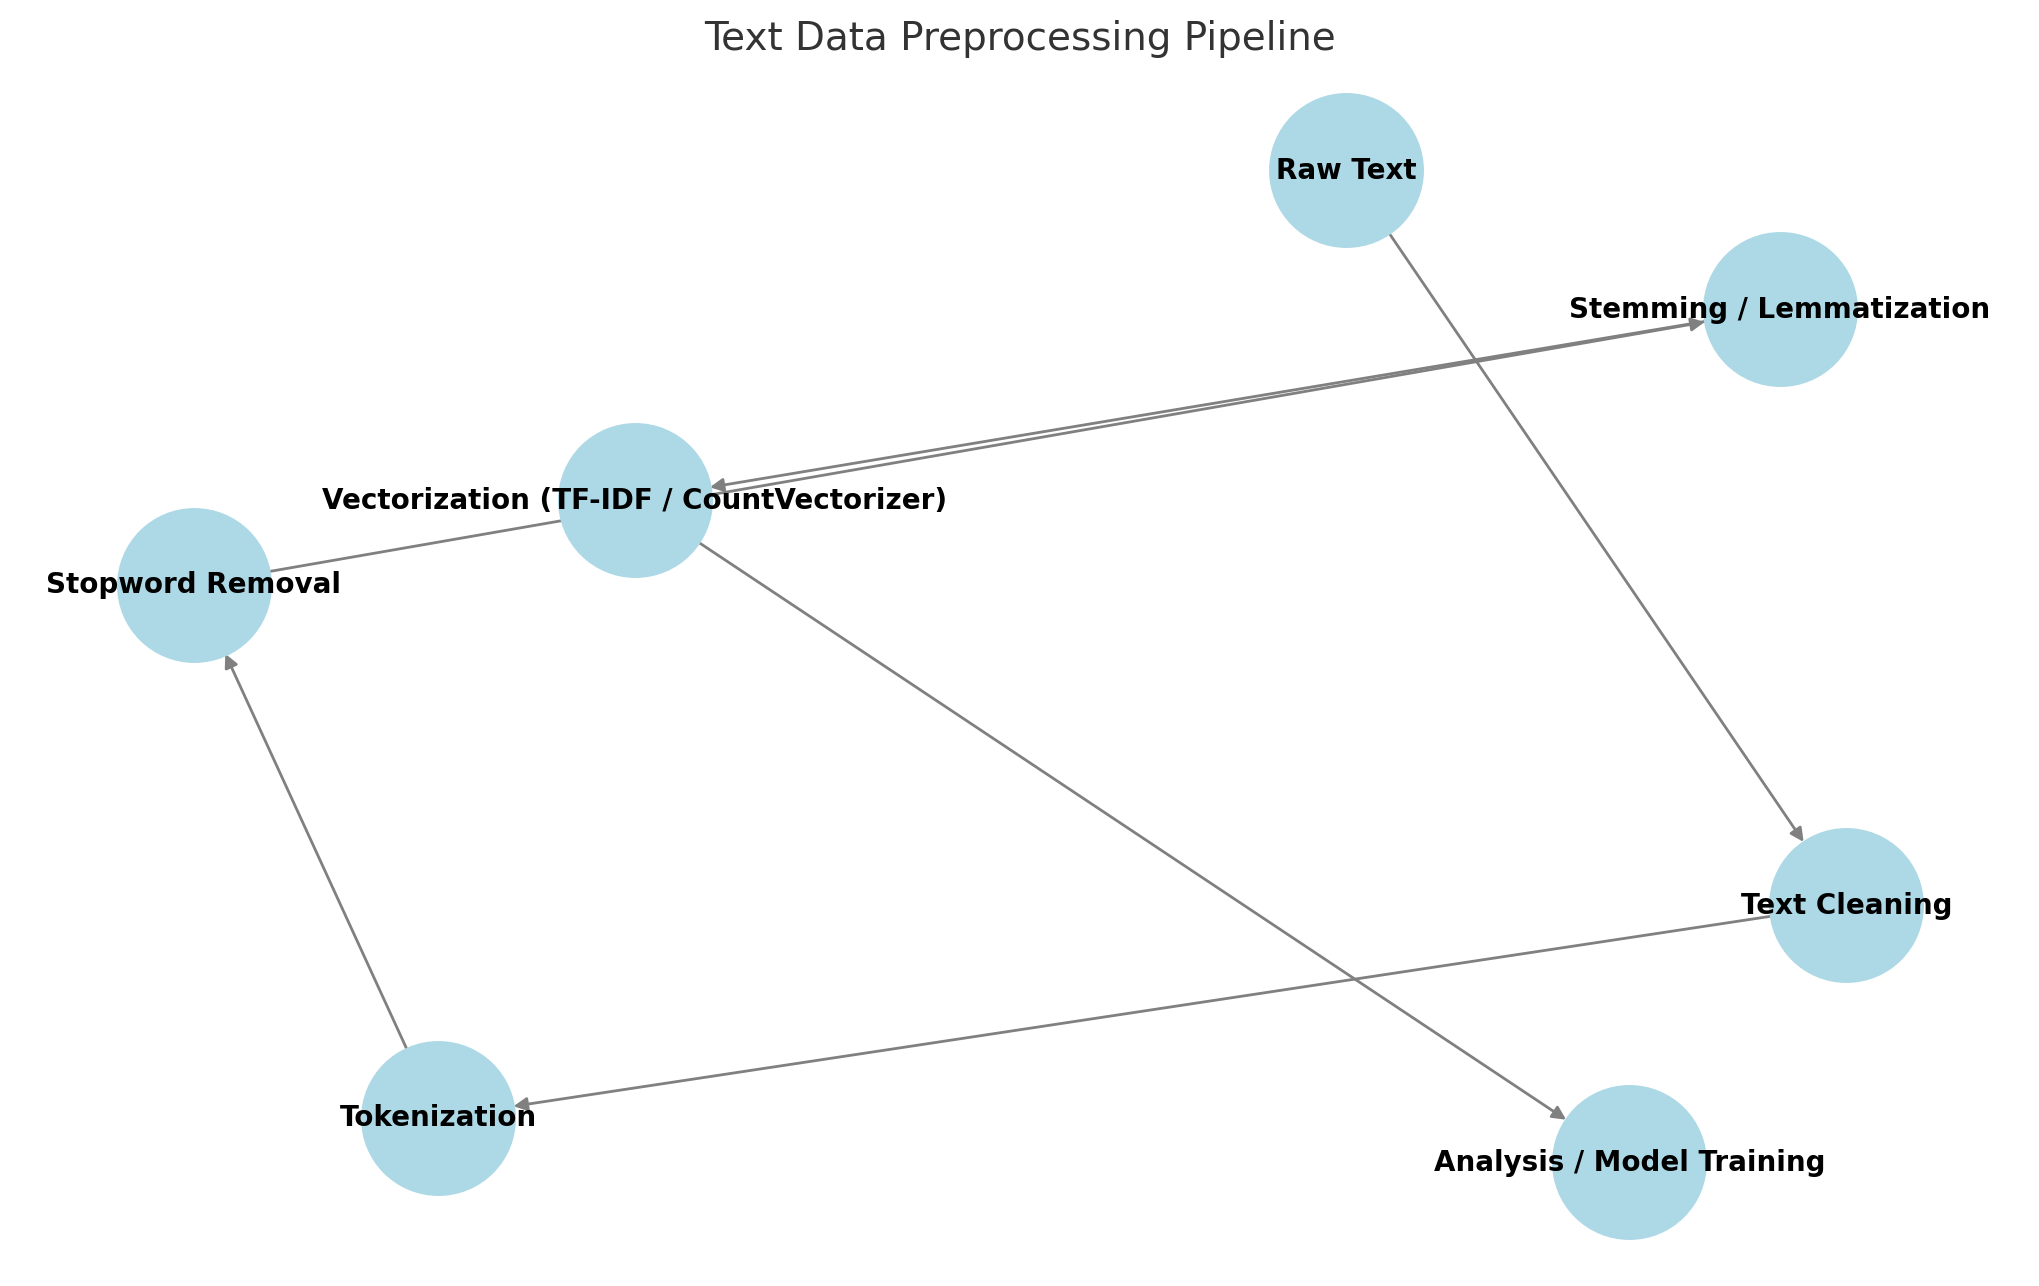

### **Load necessary libraries**

In [1]:
!pip install wordcloud tqdm pandas seaborn scikit-learn

In [2]:
import numpy as np

In [3]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/DeepakrajaR/Text-data-Pre-Processing/main/dataset/train.csv"
train = pd.read_csv(data_url)

test_url = "https://raw.githubusercontent.com/DeepakrajaR/Text-data-Pre-Processing/main/dataset/test.csv"
test = pd.read_csv(test_url)

print(train.head())
print(test.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


### **Read dataset**

### **Preview dataset**

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


## **2.1 Count number of words** <a class="anchor" id="2.1"></a>

- One of the most basic requirement in NLP analysis is to count the number of words in each tweet. The idea behind this is that **the negative sentiments contain a lesser amount of words than the positive ones**.

- We can accomplish the above task (count the number of words) by using the **split** function in python as follows-

In [6]:
def num_of_words(df):
    df['word_count'] = df['tweet'].apply(lambda x : len(str(x).split(" ")))
    print(df[['tweet','word_count']].head())

In [7]:
num_of_words(train)

                                               tweet  word_count
0   @user when a father is dysfunctional and is s...          21
1  @user @user thanks for #lyft credit i can't us...          22
2                                bihday your majesty           5
3  #model   i love u take with u all the time in ...          17
4             factsguide: society now    #motivation           8


In [8]:
num_of_words(test)

                                               tweet  word_count
0  #studiolife #aislife #requires #passion #dedic...          12
1   @user #white #supremacists want everyone to s...          20
2  safe ways to heal your #acne!!    #altwaystohe...          15
3  is the hp and the cursed child book up for res...          24
4    3rd #bihday to my amazing, hilarious #nephew...          18


- We can see that word counts in every tweet has been calculated above.

##  **2.2 Count number of characters**  <a class="anchor" id="2.2"></a>

- We can also calculate the number of characters in every tweet. The intuition is same as above.

- This can be accomplised by calculating the length of the tweet as follows -

In [9]:
def num_of_chars(df):
    df['char_count'] = df['tweet'].str.len() ## this also includes spaces
    print(df[['tweet','char_count']].head())

In [10]:
num_of_chars(train)

                                               tweet  char_count
0   @user when a father is dysfunctional and is s...         102
1  @user @user thanks for #lyft credit i can't us...         122
2                                bihday your majesty          21
3  #model   i love u take with u all the time in ...          86
4             factsguide: society now    #motivation          39


In [11]:
num_of_chars(test)

                                               tweet  char_count
0  #studiolife #aislife #requires #passion #dedic...          90
1   @user #white #supremacists want everyone to s...         101
2  safe ways to heal your #acne!!    #altwaystohe...          71
3  is the hp and the cursed child book up for res...         142
4    3rd #bihday to my amazing, hilarious #nephew...          93


- We can see that character counts in every tweet has been calculated above.

- The above calculation will also include the number of spaces, which we can remove, if required.

## **2.3 Average word length** <a class="anchor" id="2.3"></a>

- Now, number of words and number of characters are important. But, there is another feature which is also important is **average word length** of each tweet. This feature can help us to improve our model.

- We can accomplish the above task by simply taking the sum of the length of all the words and divide it by the total length of the tweet.

In [12]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

In [13]:
def avg_word_length(df):
    df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))
    print(df[['tweet','avg_word']].head())

In [14]:
avg_word_length(train)

                                               tweet  avg_word
0   @user when a father is dysfunctional and is s...  4.555556
1  @user @user thanks for #lyft credit i can't us...  5.315789
2                                bihday your majesty  5.666667
3  #model   i love u take with u all the time in ...  4.928571
4             factsguide: society now    #motivation  8.000000


In [15]:
avg_word_length(test)

                                               tweet  avg_word
0  #studiolife #aislife #requires #passion #dedic...  8.777778
1   @user #white #supremacists want everyone to s...  5.125000
2  safe ways to heal your #acne!!    #altwaystohe...  6.333333
3  is the hp and the cursed child book up for res...  5.409091
4    3rd #bihday to my amazing, hilarious #nephew...  5.066667


## **2.4 Number of stopwords** <a class="anchor" id="2.4"></a>

- Generally, while solving any NLP problem, the first thing we do is to remove the stopwords. But, what are stop words?

- **Stop Words** : A stop word is a commonly used word such as `the`, `a`, `an`, `in` which are filtered out before or after processing of natural language data (text). Sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

In [16]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

- We can count the number of stopwords as follows-

In [19]:
def stop_words(df):
    df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
    print(df[['tweet','stopwords']].head())

In [20]:
stop_words(train)

                                               tweet  stopwords
0   @user when a father is dysfunctional and is s...         10
1  @user @user thanks for #lyft credit i can't us...          5
2                                bihday your majesty          1
3  #model   i love u take with u all the time in ...          5
4             factsguide: society now    #motivation          1


In [21]:
stop_words(test)

                                               tweet  stopwords
0  #studiolife #aislife #requires #passion #dedic...          1
1   @user #white #supremacists want everyone to s...          4
2  safe ways to heal your #acne!!    #altwaystohe...          2
3  is the hp and the cursed child book up for res...          8
4    3rd #bihday to my amazing, hilarious #nephew...          4


## **2.5 Number of special characters** <a class="anchor" id="2.5"></a>

- One more interesting feature which we can extract from a tweet is to calculate the number of hashtags in it. It also helps in extracting extra information from our text data.

- Here, we make use of the `starts with` function because hashtags always appear at the beginning of a word.

In [22]:
def hash_tags(df):
    df['hashtags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
    print(df[['tweet','hashtags']].head())

In [23]:
hash_tags(train)

                                               tweet  hashtags
0   @user when a father is dysfunctional and is s...         1
1  @user @user thanks for #lyft credit i can't us...         3
2                                bihday your majesty         0
3  #model   i love u take with u all the time in ...         1
4             factsguide: society now    #motivation         1


In [24]:
hash_tags(test)

                                               tweet  hashtags
0  #studiolife #aislife #requires #passion #dedic...         7
1   @user #white #supremacists want everyone to s...         4
2  safe ways to heal your #acne!!    #altwaystohe...         4
3  is the hp and the cursed child book up for res...         3
4    3rd #bihday to my amazing, hilarious #nephew...         2


## **2.6 Number of numerics** <a class="anchor" id="2.6"></a>

- Just like we calculated the number of words, we can also calculate the number of numerics which are present in the tweets. It is a useful feature that should be run while doing similar exercises. For example -

In [25]:
def num_numerics(df):
    df['numerics'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
    print(df[['tweet','numerics']].head())

In [26]:
num_numerics(train)

                                               tweet  numerics
0   @user when a father is dysfunctional and is s...         0
1  @user @user thanks for #lyft credit i can't us...         0
2                                bihday your majesty         0
3  #model   i love u take with u all the time in ...         0
4             factsguide: society now    #motivation         0


In [27]:
num_numerics(test)

                                               tweet  numerics
0  #studiolife #aislife #requires #passion #dedic...         0
1   @user #white #supremacists want everyone to s...         0
2  safe ways to heal your #acne!!    #altwaystohe...         0
3  is the hp and the cursed child book up for res...         0
4    3rd #bihday to my amazing, hilarious #nephew...         0


## **2.7 Number of Uppercase words**  <a class="anchor" id="2.7"></a>

- Anger or rage is quite often expressed by writing in UPPERCASE words which makes this a necessary operation to identify those words.

In [28]:
def num_uppercase(df):
    df['upper_case'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    print(df[['tweet','upper_case']].head())

In [29]:
num_uppercase(train)

                                               tweet  upper_case
0   @user when a father is dysfunctional and is s...           0
1  @user @user thanks for #lyft credit i can't us...           0
2                                bihday your majesty           0
3  #model   i love u take with u all the time in ...           0
4             factsguide: society now    #motivation           0


In [30]:
num_uppercase(test)

                                               tweet  upper_case
0  #studiolife #aislife #requires #passion #dedic...           0
1   @user #white #supremacists want everyone to s...           0
2  safe ways to heal your #acne!!    #altwaystohe...           0
3  is the hp and the cursed child book up for res...           0
4    3rd #bihday to my amazing, hilarious #nephew...           0


# **3. Basic Text Processing** <a class="anchor" id="3"></a>

- So far, we have learned how to extract basic features from text data.

- Now, we move onto text and feature extraction.

- Our first step should be to clean the data in order to obtain better features.

- We will achieve this by doing some of the basic pre-processing steps on our training data.

- So, let’s get into it.


## **3.1 CountVectorization** <a class="anchor" id="3.1"></a>

- **[CounterVectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)** is a SciKitLearn library takes any text document and returns each unique word as a feature with the count of number of times that word occurs.

- While this can generate lot of features with some extremely useful parameters that help avoid that including stop_words, n_grams, and max_features.

- **Stop words** generates a list of words that will not be included as a feature. The primary use of this is the “English” dictionary where it will get rid of insignificant words like “is, the, a, it, as “which can appear quite frequently, but have little to no influence on our end goal.

- **ngrams_range** selects how you can group words together. Instead of having NLP return each word separately, we can get results like “Hello again” if it equals 2 or “See you later” if it equals 3.

- **max_features** is how many features you choose to create. If we choose it to equal none it means that we will get every and all words as features, but if we set it equal to 50 you will only get the 50 most frequently used words.




In [31]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
         ]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [32]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [33]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names_out())

['and this' 'document is' 'first document' 'is the' 'is this'
 'second document' 'the first' 'the second' 'the third' 'third one'
 'this document' 'this is' 'this the']


In [34]:
print(X2.toarray())

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


## **3.2 HashingVectorizer** <a class="anchor" id="3.2"></a>

- [Hashing Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html) converts text to a matrix of occurrences using the “hashing trick”.


- It converts a collection of text documents to a matrix of token occurrences.

- It turns a collection of text documents into a scipy.sparse matrix holding token occurrence counts (or binary occurrence information), possibly normalized as token frequencies if norm=’l1’ or projected on the euclidean unit sphere if norm=’l2’.

- This text vectorizer implementation uses the hashing trick to find the token string name to feature integer index mapping.

- Each word is mapped to a feature and using the hash function converts it to a hash.

- If the word occurs again in the body of the text it is converted to that same feature which allows us to count it in the same feature without retaining a dictionary in memory.

In [35]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
         ]
vectorizer = HashingVectorizer(n_features=2**4)
X = vectorizer.fit_transform(corpus)
print(X.shape)

(4, 16)


## **3.3 Lower Casing** <a class="anchor" id="3.3"></a>

- Another pre-processing step which we will do is to transform our tweets into lower case.
- This avoids having multiple copies of the same words.
- For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [36]:
def lower_case(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    print(df['tweet'].head())

In [37]:
lower_case(train)

0    @user when a father is dysfunctional and is so...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model i love u take with u all the time in ur...
4                  factsguide: society now #motivation
Name: tweet, dtype: object


In [38]:
lower_case(test)

0    #studiolife #aislife #requires #passion #dedic...
1    @user #white #supremacists want everyone to se...
2    safe ways to heal your #acne!! #altwaystoheal ...
3    is the hp and the cursed child book up for res...
4    3rd #bihday to my amazing, hilarious #nephew e...
Name: tweet, dtype: object


## **3.4 Punctuation Removal** <a class="anchor" id="3.4"></a>

- The next step is to remove punctuation as it doesn’t add any extra information while treating text data.

- Therefore removing all instances of it will help us reduce the size of the training data.

In [39]:
def punctuation_removal(df):
    df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
    print(df['tweet'].head())

In [40]:
punctuation_removal(train)

0    @user when a father is dysfunctional and is so...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model i love u take with u all the time in ur...
4                  factsguide: society now #motivation
Name: tweet, dtype: object


In [41]:
punctuation_removal(test)

0    #studiolife #aislife #requires #passion #dedic...
1    @user #white #supremacists want everyone to se...
2    safe ways to heal your #acne!! #altwaystoheal ...
3    is the hp and the cursed child book up for res...
4    3rd #bihday to my amazing, hilarious #nephew e...
Name: tweet, dtype: object


- We can see that all the punctuation, including ‘#’ and ‘@’, has been removed from the training data.

## **3.5 Stop Words Removal**  <a class="anchor" id="3.5"></a>

- As we discussed earlier, stop words (or commonly occurring words) should be removed from the text data.
- For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

In [42]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [43]:
def stop_words_removal(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    print(df['tweet'].head())

In [44]:
stop_words_removal(train)

0    @user father dysfunctional selfish drags kids ...
1    @user @user thanks #lyft credit can't use caus...
2                                       bihday majesty
3    #model love u take u time urð±!!! ððð...
4                      factsguide: society #motivation
Name: tweet, dtype: object


In [45]:
stop_words_removal(test)

0    #studiolife #aislife #requires #passion #dedic...
1    @user #white #supremacists want everyone see n...
2    safe ways heal #acne!! #altwaystoheal #healthy...
3    hp cursed child book reservations already? yes...
4    3rd #bihday amazing, hilarious #nephew eli ahm...
Name: tweet, dtype: object


## **3.6 Frequent Words Removal**  <a class="anchor" id="3.6"></a>

- We can also remove commonly occurring words from our text data.

- First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.


In [46]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:10]
freq

,count
@user,17291
&amp;,1574
day,1454
#love,1449
happy,1328
-,1244
u,1116
love,1112
i'm,992
like,920


Now, we will remove these words as their presence will not of any use in classification of our text data.

In [47]:
freq = list(freq.index)

In [48]:
def frequent_words_removal(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    print(df['tweet'].head())

In [49]:
frequent_words_removal(train)

0    father dysfunctional selfish drags kids dysfun...
1    thanks #lyft credit can't use cause offer whee...
2                                       bihday majesty
3    #model take time urð±!!! ðððð ð...
4                      factsguide: society #motivation
Name: tweet, dtype: object


In [50]:
frequent_words_removal(test)

0    #studiolife #aislife #requires #passion #dedic...
1    #white #supremacists want everyone see new â...
2    safe ways heal #acne!! #altwaystoheal #healthy...
3    hp cursed child book reservations already? yes...
4    3rd #bihday amazing, hilarious #nephew eli ahm...
Name: tweet, dtype: object


## **3.7 Rare Words Removal**  <a class="anchor" id="3.7"></a>

- Now, we will remove rarely occurring words from the text.
- Because they’re so rare, the association between them and other words is dominated by noise.
- We can replace rare words with a more general form and then this will have higher counts.

In [51]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[-10:]
freq

,count
ukip,1
europ...,1
"them,we",1
joke...,1
"kylo,",1
prick,1
berry,1
ciroc,1
cents,1
chisolm.,1


In [52]:
freq = list(freq.index)

In [53]:
def rare_words_removal(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    print(df['tweet'].head())

In [54]:
rare_words_removal(train)

0    father dysfunctional selfish drags kids dysfun...
1    thanks #lyft credit can't use cause offer whee...
2                                       bihday majesty
3    #model take time urð±!!! ðððð ð...
4                      factsguide: society #motivation
Name: tweet, dtype: object


In [55]:
rare_words_removal(test)

0    #studiolife #aislife #requires #passion #dedic...
1    #white #supremacists want everyone see new â...
2    safe ways heal #acne!! #altwaystoheal #healthy...
3    hp cursed child book reservations already? yes...
4    3rd #bihday amazing, hilarious #nephew eli ahm...
Name: tweet, dtype: object


- All these pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective.

## **3.8 Spelling Correction**  <a class="anchor" id="3.8"></a>

- Now tweets can be filled with plethora of spelling mistakes. Our task is to rectify these spelling mistakes.

- In that context, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

- To accomplish the above task, we will use the textblob library as follows-


In [56]:
from textblob import TextBlob

In [57]:
def spell_correction(df):
    return df['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [58]:
spell_correction(train)

,tweet
0,father dysfunctional selfish drags kiss dysfun...
1,thanks #left credit can't use cause offer whee...
2,midday majesty
3,#model take time or±!!! ðððð ð¦...
4,factsguide: society #motivation


In [59]:
spell_correction(test)

,tweet
0,#studiolife #dislike #requires #passion #educa...
1,#white #supremacists want everyone see new â...
2,safe ways heal #acne!! #altwaystoheal #healthy...
3,he cursed child book reservations already? yes...
4,"rd #midday amazing, hilarious #nephew epi thei..."


## **3.9 Tokenization** <a class="anchor" id="3.9"></a>

- [Tokenization](https://www.geeksforgeeks.org/nlp-how-tokenizing-text-sentence-words-works/) refers to dividing the text into a sequence of words or sentences.

- In our example, we have used the textblob library to first transform our tweets into a blob and then converted them into a series of words.

In [60]:
! python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [61]:
def tokens(df):
    return TextBlob(df['tweet'][1]).words

In [62]:
tokens(train)

WordList(['thanks', 'lyft', 'credit', 'ca', "n't", 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked'])

In [63]:
tokens(test)

WordList(['white', 'supremacists', 'want', 'everyone', 'see', 'new', 'â\x80\x98', 'birdsâ\x80\x99', 'movie', 'â\x80\x94', 'hereâ\x80\x99s'])

## **3.10 Stemming** <a class="anchor" id="3.10"></a>

- [Stemming](https://www.geeksforgeeks.org/introduction-to-stemming/) refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

- So, stemming takes a word and refers it back to its base or root form. **Stems**, **Stemming**, **Stemmed** and **Stemtization** are all based on the single word **stem**.

- For this purpose, we will use *PorterStemmer* from the NLTK library.

In [64]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [65]:
def stemming(df):
    return df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [66]:
stemming(train)

,tweet
0,father dysfunct selfish drag kid dysfunction. ...
1,thank #lyft credit can't use caus offer wheelc...
2,bihday majesti
3,#model take time urð±!!! ðððð ð...
4,factsguide: societi #motiv


In [67]:
stemming(test)

,tweet
0,#studiolif #aislif #requir #passion #dedic #wi...
1,#white #supremacist want everyon see new â #...
2,safe way heal #acne!! #altwaystoh #healthi #he...
3,"hp curs child book reserv already? yes, where?..."
4,"3rd #bihday amazing, hilari #nephew eli ahmir!..."


- We can see that *dysfunctional* has been transformed into *dysfunct*, among other changes.

## **3.11 Lemmatization** <a class="anchor" id="3.11"></a>

- [Lemmatization](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/) is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

- Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices.

- Lemmatization makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [68]:
from textblob import Word

In [69]:
def lemmatization(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    print(df['tweet'].head())

In [70]:
lemmatization(train)

0    father dysfunctional selfish drag kid dysfunct...
1    thanks #lyft credit can't use cause offer whee...
2                                       bihday majesty
3    #model take time urð±!!! ðððð ð...
4                      factsguide: society #motivation
Name: tweet, dtype: object


In [71]:
lemmatization(test)

0    #studiolife #aislife #requires #passion #dedic...
1    #white #supremacists want everyone see new â...
2    safe way heal #acne!! #altwaystoheal #healthy ...
3    hp cursed child book reservation already? yes,...
4    3rd #bihday amazing, hilarious #nephew eli ahm...
Name: tweet, dtype: object


# **4. Advanced Text Processing** <a class="anchor" id="4"></a>

- Until now, we have covered all the basic pre-processing steps which are helpful in order to clean our data.

- Now,we will move on and focus on advanced text-processing or NLP techniques.

## **4.1 N-grams** <a class="anchor" id="4.1"></a>

- [N-grams](https://kavita-ganesan.com/what-are-n-grams/#.Xo3jccgzbIU) are the combination of multiple words used together. Ngrams with N=1 are called **unigrams**. Similarly, **bigrams (N=2)**, **trigrams (N=3)** and so on.

- **Unigrams** do not usually contain as much information as compared to **bigrams** and **trigrams**. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one.

- The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

- Now, we will extract bigrams from our tweets using the ngrams function of the textblob library.

In [72]:
from textblob import TextBlob

In [73]:
def combination_of_words(df):
    return (TextBlob(df['tweet'][0]).ngrams(2))

In [74]:
combination_of_words(train)

[WordList(['father', 'dysfunctional']),
 WordList(['dysfunctional', 'selfish']),
 WordList(['selfish', 'drag']),
 WordList(['drag', 'kid']),
 WordList(['kid', 'dysfunction']),
 WordList(['dysfunction', 'run'])]

In [75]:
combination_of_words(test)

[WordList(['studiolife', 'aislife']),
 WordList(['aislife', 'requires']),
 WordList(['requires', 'passion']),
 WordList(['passion', 'dedication']),
 WordList(['dedication', 'willpower']),
 WordList(['willpower', 'find']),
 WordList(['find', 'newmaterialsâ\x80¦'])]

## **4.2 Term Frequency**  <a class="anchor" id="4.2"></a>

- Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

- Therefore, we can generalize term frequency as:

**TF = (Number of times term T appears in the particular row) / (number of terms in that row)**


- We will create a Term-Frequency table of a tweet as follows-

In [76]:
def term_frequency(df):
    tf1 = (df['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
    tf1.columns = ['words','tf']
    return tf1.head()

In [77]:
term_frequency(train)

<ipython-input-76-d64bcf769f21>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf1 = (df['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
<ipython-input-76-d64bcf769f21>:2: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf1 = (df['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()


,words,tf
0,thanks,1
1,#lyft,1
2,credit,1
3,can't,1
4,use,1


In [78]:
term_frequency(test)

<ipython-input-76-d64bcf769f21>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf1 = (df['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
<ipython-input-76-d64bcf769f21>:2: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf1 = (df['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()


,words,tf
0,#white,1
1,#supremacists,1
2,want,1
3,everyone,1
4,see,1


## **4.3 Inverse Document Frequency (IDF)** <a class="anchor" id="4.3"></a>

- The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

- Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

- IDF can be calculated as follows -

   **IDF = log(N/n)**,
   
 where, N is the total number of rows and n is the number of rows in which the word was present.

- Now, we will calculate IDF for the same tweets for which we calculated the term frequency.

In [79]:
tf1 = (train['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

<ipython-input-79-612b125c1616>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf1 = (train['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
<ipython-input-79-612b125c1616>:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf1 = (train['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()


,words,tf
0,thanks,1
1,#lyft,1
2,credit,1
3,can't,1
4,use,1


In [80]:
tf2 = (test['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf2.columns = ['words','tf']
tf2.head()

<ipython-input-80-c806e33f6897>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf2 = (test['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
<ipython-input-80-c806e33f6897>:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf2 = (test['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()


,words,tf
0,#white,1
1,#supremacists,1
2,want,1
3,everyone,1
4,see,1


The more the value of IDF, the more unique is the word.

## **4.4 Term Frequency – Inverse Document Frequency (TF-IDF)** <a class="anchor" id="4.4"></a>

- **TF-IDF** is the multiplication of the TF and IDF which we calculated again below for convinience.

In [81]:
tf1 = (train['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']

<ipython-input-81-67ed35a8f617>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf1 = (train['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
<ipython-input-81-67ed35a8f617>:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf1 = (train['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()


In [82]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['tweet'].str.contains(word)])))

In [83]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,thanks,1,4.597751,4.597751
1,#lyft,1,9.273691,9.273691
2,credit,1,7.327781,7.327781
3,can't,1,3.753564,3.753564
4,use,1,3.382968,3.382968
5,cause,1,5.610129,5.610129
6,offer,1,6.522155,6.522155
7,wheelchair,1,9.273691,9.273691
8,van,1,5.236505,5.236505
9,pdx.,1,8.762865,8.762865


- We can see that the TF-IDF has penalized words like ‘don’t’, ‘can’t’, and ‘use’ because they are commonly occurring words. However, it has given a high weight to “disappointed” since that will be very useful in determining the sentiment of the tweet.

- We don’t have to calculate TF and IDF every time beforehand and then multiply it to obtain TF-IDF. Instead, sklearn has a separate function to directly obtain it:

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['tweet'])
train_vect

<31962x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 112979 stored elements in Compressed Sparse Row format>

## **4.5 Bag of Words** <a class="anchor" id="4.5"></a>

- [Bag of Words (BoW)](https://machinelearningmastery.com/gentle-introduction-bag-words-model/) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

- For implementation, sklearn provides a separate function for it as shown below:

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['tweet'])
train_bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 132740 stored elements in Compressed Sparse Row format>

## **4.6 Sentiment Analysis**  <a class="anchor" id="4.6"></a>

- Now we come to our problem which was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library).

- We will check the sentiment of the first few tweets as follows -

In [86]:
def polarity_subjectivity(df):
    return df['tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

In [87]:
polarity_subjectivity(train)

,tweet
0,"(-0.3, 0.5354166666666667)"
1,"(0.2, 0.2)"
2,"(0.0, 0.0)"
3,"(0.0, 0.0)"
4,"(0.0, 0.0)"


In [88]:
polarity_subjectivity(test)

,tweet
0,"(0.0, 0.0)"
1,"(0.06818181818181818, 0.22727272727272727)"
2,"(0.78125, 0.5)"
3,"(0.5, 1.0)"
4,"(0.43125, 0.625)"


- We can can see that it returns a tuple representing polarity and subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [89]:
def sentiment_analysis(df):
    df['sentiment'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
    return df[['tweet','sentiment']].head()

In [90]:
sentiment_analysis(train)

,tweet,sentiment
0,father dysfunctional selfish drag kid dysfunct...,-0.3
1,thanks #lyft credit can't use cause offer whee...,0.2
2,bihday majesty,0.0
3,#model take time urð±!!! ðððð ð...,0.0
4,factsguide: society #motivation,0.0


In [91]:
sentiment_analysis(test)

,tweet,sentiment
0,#studiolife #aislife #requires #passion #dedic...,0.000000
1,#white #supremacists want everyone see new â...,0.068182
2,safe way heal #acne!! #altwaystoheal #healthy ...,0.781250
3,"hp cursed child book reservation already? yes,...",0.500000
4,"3rd #bihday amazing, hilarious #nephew eli ahm...",0.431250


## 4.7 Advanced Data Visualization and Analysis

In [92]:
# Required imports
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from wordcloud import WordCloud
from tqdm.notebook import tqdm
from textblob import TextBlob
from collections import Counter

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [93]:
class TextPreprocessor:
    def __init__(self):
        """Initialize the text preprocessor with necessary components"""
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.performance_metrics = {
            'cleaning_time': [],
            'tokenization_time': [],
            'normalization_time': [],
            'feature_extraction_time': []
        }

    def clean_text(self, text):
        """Remove HTML tags and normalize unicode characters"""
        start_time = time.time()

        # Remove HTML tags
        text = BeautifulSoup(text, 'html.parser').get_text()

        # Normalize unicode characters
        text = unicodedata.normalize('NFKD', text)

        # Remove special characters and extra whitespace
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()

        self.performance_metrics['cleaning_time'].append(time.time() - start_time)
        return text

    def tokenize(self, text):
        """Split text into tokens"""
        start_time = time.time()

        tokens = word_tokenize(text)

        self.performance_metrics['tokenization_time'].append(time.time() - start_time)
        return tokens

    def normalize(self, tokens):
        """Normalize tokens"""
        start_time = time.time()

        # Convert to lowercase and remove stop words
        tokens = [token.lower() for token in tokens]
        tokens = [token for token in tokens if token not in self.stop_words]

        # Lemmatization
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens]

        self.performance_metrics['normalization_time'].append(time.time() - start_time)
        return tokens

    def process_text(self, text):
        """Complete preprocessing pipeline"""
        cleaned_text = self.clean_text(text)
        tokens = self.tokenize(cleaned_text)
        normalized_tokens = self.normalize(tokens)
        return {
            'original_text': text,
            'cleaned_text': cleaned_text,
            'tokens': normalized_tokens,
            'processed_text': ' '.join(normalized_tokens)
        }

    def get_performance_metrics(self):
        """Return average processing times"""
        return {
            'avg_cleaning_time': np.mean(self.performance_metrics['cleaning_time']),
            'avg_tokenization_time': np.mean(self.performance_metrics['tokenization_time']),
            'avg_normalization_time': np.mean(self.performance_metrics['normalization_time'])
        }

In [94]:
# Create instance of TextPreprocessor
preprocessor = TextPreprocessor()

# Process tweets with progress tracking
processed_results = []
for tweet in tqdm(train['tweet'], desc="Processing tweets"):
    try:
        result = preprocessor.process_text(tweet)
        processed_results.append(result)
    except Exception as e:
        print(f"Error processing tweet: {e}")
        continue

Processing tweets:   0%|          | 0/31962 [00:00<?, ?it/s]

In [95]:
# Create DataFrame with results
processed_df = pd.DataFrame(processed_results)

In [96]:
# 1. Text Length Analysis
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Character Count')

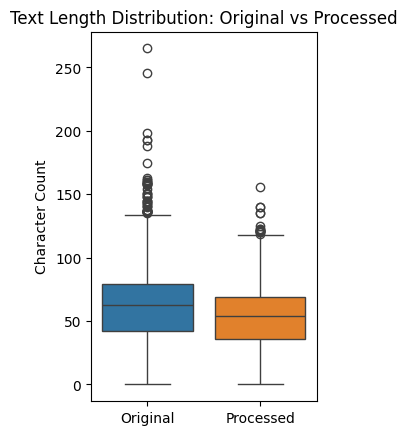

In [97]:
# Original vs Processed Text Length
plt.subplot(1, 2, 1)
length_data = pd.DataFrame({
    'Original': processed_df['original_text'].str.len(),
    'Processed': processed_df['processed_text'].str.len()
})
sns.boxplot(data=length_data)
plt.title('Text Length Distribution: Original vs Processed')
plt.ylabel('Character Count')

Text Length Distribution: Original vs Processed:

The box plot compares the character count of text before and after processing.
The median text length has reduced, indicating effective preprocessing.
Outliers in both distributions suggest some text samples were significantly longer than others.
The interquartile range (IQR) is slightly compressed in the processed data, reflecting reduced variability.

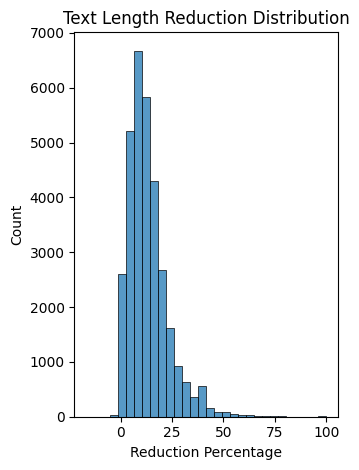

In [98]:
# Length Reduction Percentage
plt.subplot(1, 2, 2)
length_reduction = (length_data['Original'] - length_data['Processed']) / length_data['Original'] * 100
sns.histplot(length_reduction, bins=30)
plt.title('Text Length Reduction Distribution')
plt.xlabel('Reduction Percentage')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Text Length Reduction Distribution:

The histogram displays the percentage reduction in text length after processing.
The majority of reductions fall between 0% and 30%, with a peak around 10-15%, indicating moderate trimming.
A small number of cases have extreme reductions, possibly due to removal of excessive whitespace, special characters, or stopwords.
The right-skewed distribution suggests that most texts retained a substantial portion of their original content.

Text(0, 0.5, 'Count')

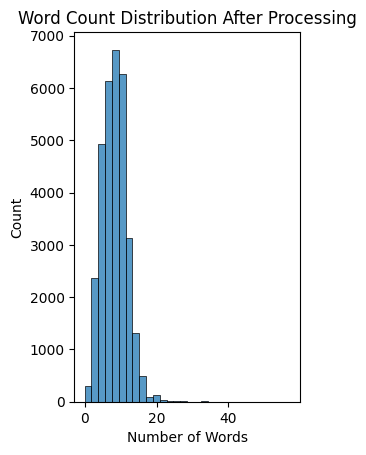

In [99]:
# Word Count Distribution
plt.subplot(1, 2, 1)
word_counts = processed_df['tokens'].apply(len)
sns.histplot(word_counts, bins=30)
plt.title('Word Count Distribution After Processing')
plt.xlabel('Number of Words')
plt.ylabel('Count')

Word Count Distribution After Processing:

The histogram shows how many words remain in each text after preprocessing.
Most texts contain between 5 to 20 words, with a sharp decline beyond that range.
The highly skewed nature suggests that a large portion of the dataset consists of short texts.
This distribution highlights that preprocessing effectively condensed the text while preserving key content.

In [100]:
mean_words = word_counts.mean()
median_words = word_counts.median()
print(f"Mean word count: {mean_words:.2f}")
print(f"Median word count: {median_words:.2f}")

Mean word count: 8.25
Median word count: 8.00


<Axes: title={'center': 'Word Count Distribution After Processing with KDE'}, xlabel='tokens', ylabel='Count'>

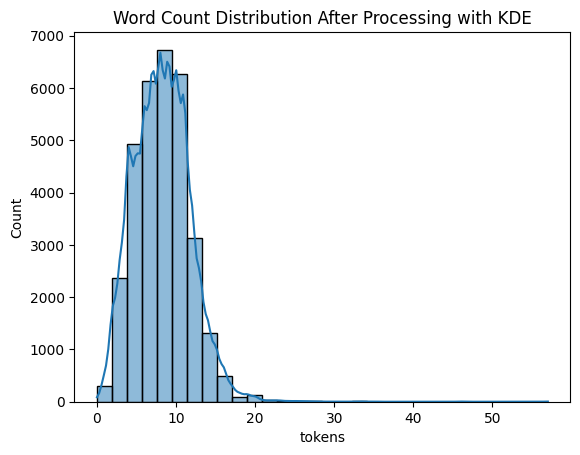

In [101]:
plt.title('Word Count Distribution After Processing with KDE')
sns.histplot(word_counts, bins=30, kde=True) #kde=True adds the density estimate

- Similar to the previous image, the word count distribution is right-skewed.
- The KDE (Kernel Density Estimate) overlay provides a smoothed view of the distribution, highlighting the peak around a low word count and the gradual decline towards higher word counts.
- This visualization confirms that the majority of processed documents contain a limited number of words, with a long tail of documents containing more words.


<ipython-input-113-2ad643218d20>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_words.values, y=top_10_words.index, palette=colors)


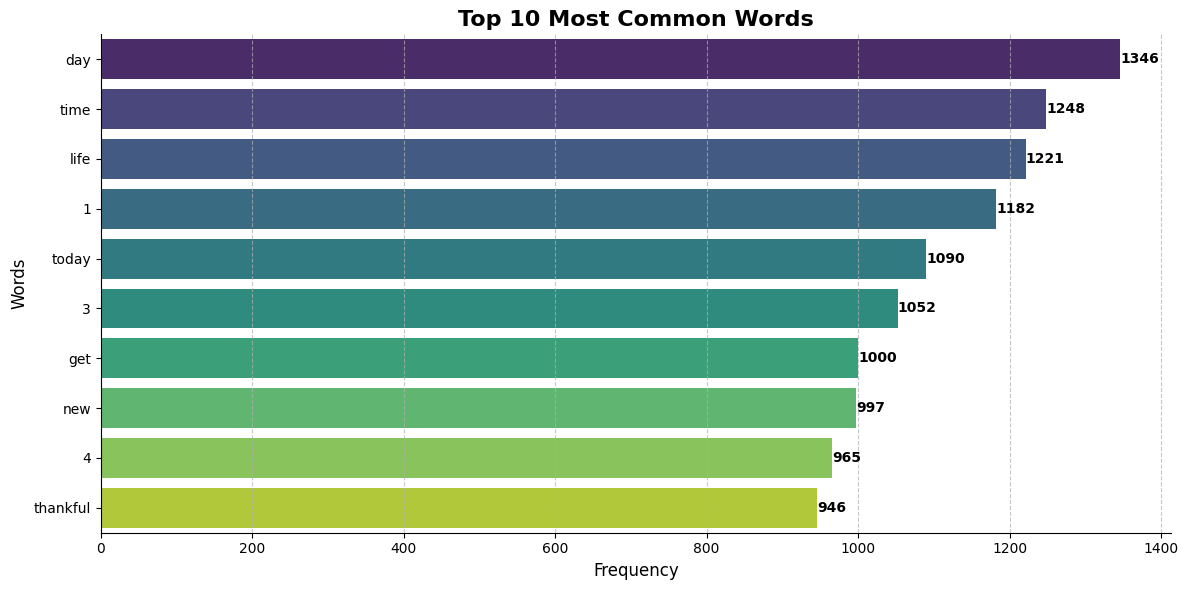

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already created the processed_df and calculated word frequencies

plt.figure(figsize=(12, 6))  # Increase figure size for better visibility

all_words = [word for tokens in processed_df['tokens'] for word in tokens]
word_freq = pd.Series(all_words).value_counts()

# Remove the anomalous word, probably an OCR error
word_freq = word_freq.drop(word_freq.index[0])

# Get the top 10 words and their frequencies
top_10_words = word_freq.head(10)

# Use a visually appealing color palette
colors = sns.color_palette("viridis", 10)

# Create the horizontal bar plot
ax = sns.barplot(x=top_10_words.values, y=top_10_words.index, palette=colors)

# Customize the plot
plt.title('Top 10 Most Common Words', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)

# Add value labels to the end of each bar
for i, v in enumerate(top_10_words.values):
    ax.text(v + 0.5, i, str(v), va='center', fontweight='bold')

# Remove top and right spines
sns.despine()

# Adjust layout and display grid lines
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Top 10 Most Common Words:
- The high frequency of "day," "time," and "today" suggests that the text data is strongly focused on daily events, routines, or reflections. This could indicate personal diaries, social media updates, or reports on daily activities.

- The presence of words like "life" and "thankful" implies a generally positive or reflective sentiment within the text. The authors (or subjects) may frequently express gratitude or contemplate their existence.

- The inclusion of the numbers "1," "3," and "4" is unexpected and warrants further investigation. They might be related to specific categories, numbered lists, or ordinal positions within the data. Their high frequency suggests they hold significant meaning in the dataset's context.

- The words "get" and "new" imply action, acquisition, or the experience of novelty. This could signify a focus on achieving goals, obtaining new things, or undergoing changes within the subjects' lives.

- The word "day" (with a frequency of 1346) is substantially more frequent than any other word in the top 10. This highlights the data's strong focus on daily occurrences and the potential importance of analyzing patterns or themes within specific days.

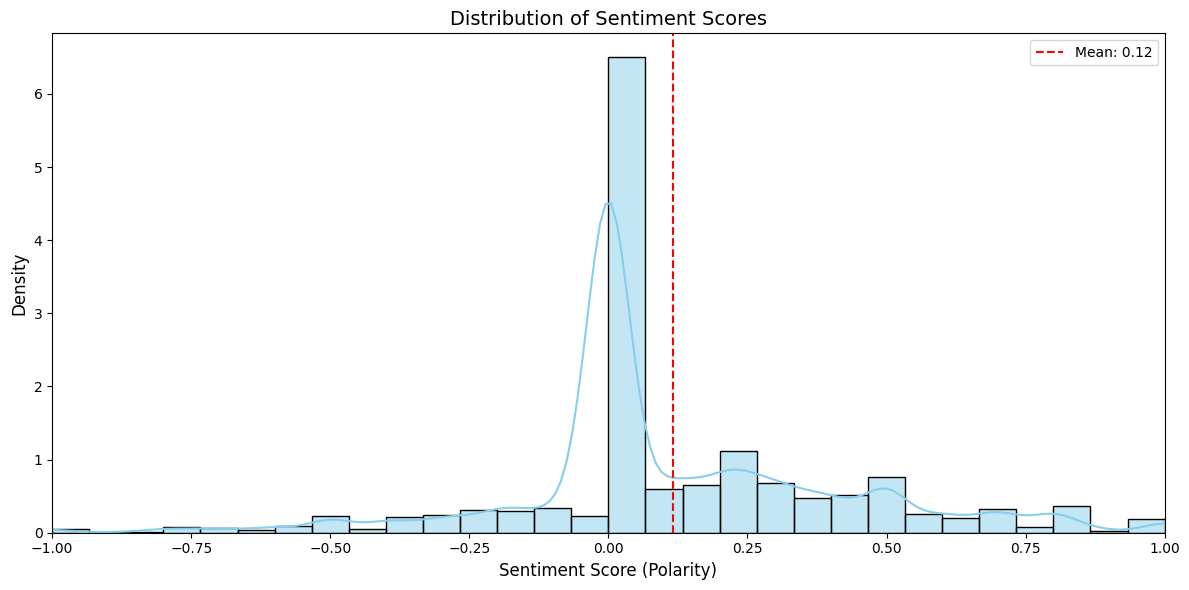

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import pandas as pd

# Assuming you have 'processed_df' DataFrame with 'processed_text' column

# Calculate sentiment scores
sentiment_scores = processed_df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(12, 6))  # Adjust figure size

# Sentiment Distribution
sns.histplot(x=sentiment_scores, bins=30, kde=True, color='skyblue', stat="density") # Added KDE, density normalization, and color
plt.title('Distribution of Sentiment Scores', fontsize=14)  # More descriptive title
plt.xlabel('Sentiment Score (Polarity)', fontsize=12) # Clear x-axis label
plt.ylabel('Density', fontsize=12)  # Y-axis label for density
plt.xlim(-1, 1) # Limits x axis

# Add mean sentiment line
mean_sentiment = sentiment_scores.mean()
plt.axvline(mean_sentiment, color='red', linestyle='--', label=f'Mean: {mean_sentiment:.2f}')

plt.legend() # Show the label

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Sentiment Distribution:

- The sentiment distribution is heavily skewed towards a neutral sentiment score (around 0.0), with a very high count. This shows that the majority of the analyzed text is neutral in sentiment.

- There is a wider, but lower, distribution of sentiment scores ranging from -1.0 to 1.0, indicating a variety of positive and negative sentiments are also expressed, though less frequently.

- The shape of the distribution indicates that the sentiment is more often neutral than strongly positive or negative.

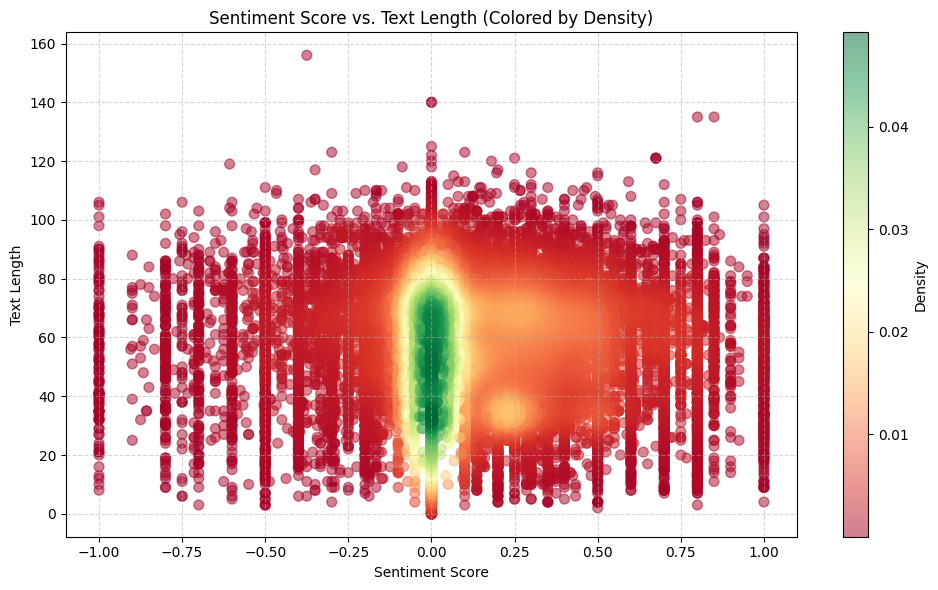

In [116]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Assuming sentiment_scores and processed_df are already defined

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

# Calculate point density:
from scipy.stats import gaussian_kde
x = sentiment_scores
y = processed_df['processed_text'].str.len()
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.scatter(x, y, c=z, s=50, cmap='RdYlGn', alpha=0.5) # Color by density
plt.colorbar(label='Density') # Add color bar

plt.title('Sentiment Score vs. Text Length (Colored by Density)')
plt.xlabel('Sentiment Score')
plt.ylabel('Text Length')
plt.grid(True, linestyle='--', alpha=0.5)  # Add a subtle grid

# Consider adding a regression line
# m, b = np.polyfit(sentiment_scores, processed_df['processed_text'].str.len(), 1)
# plt.plot(sentiment_scores, m*sentiment_scores + b, color='red')

plt.tight_layout()
plt.show()


Sentiment vs Text Length:

- Most of the data points are clustered around a sentiment score of 0, indicating that a large portion of the text samples are neutral in sentiment.

- The highest density of data points falls within a text length of approximately 60-80 characters, suggesting that the majority of texts are of this length, regardless of sentiment.

- The data spans the entire sentiment spectrum (from -1 to 1), but there is a visible drop in density as you move towards the extreme positive and negative sentiment scores, which suggests there are less polarizing opinions.

- Texts of varying lengths are present across the entire sentiment spectrum, implying that sentiment is not strongly dictated by the length of the text.

- There's a relatively sharp drop-off in data point density as text length increases significantly beyond 80. This means that longer texts are less common in the dataset, regardless of their sentiment score.

In [106]:
# 4. Word Cloud Visualization
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [107]:
# Separate texts by sentiment
positive_texts = ' '.join(processed_df['processed_text'][sentiment_scores > 0.2])
negative_texts = ' '.join(processed_df['processed_text'][sentiment_scores < -0.2])


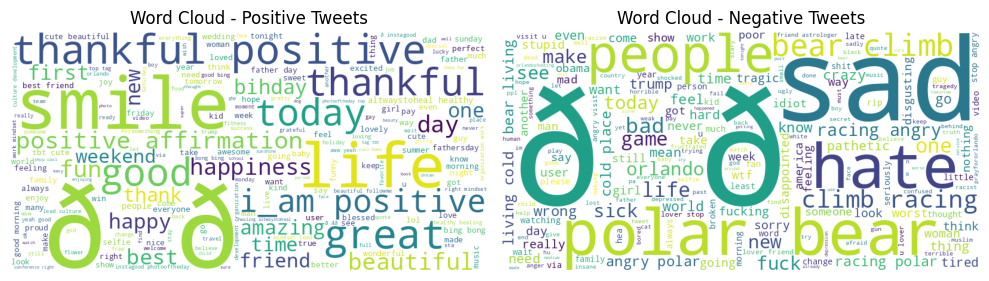

In [120]:
# Generate and plot word clouds
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
plt.imshow(wordcloud_pos)
plt.title('Word Cloud - Positive Tweets')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)
plt.imshow(wordcloud_neg)
plt.title('Word Cloud - Negative Tweets')
plt.axis('off')

plt.tight_layout()
plt.show()

Word Cloud - Positive Tweets / Word Cloud - Negative Tweets:

- Positive Tweets: The prominent words include "life," "thankful," "smile," and "positive," suggesting expressions of gratitude, happiness, and optimism.

- Positive Tweets: Words like "good," "great," and "happy" reinforce the overall positive sentiment being expressed.

- Negative Tweets: The prominent words include "polar," "bear," and the character "δ" which suggest topics related to animals, and perhaps locations.

- Negative Tweets: Words like "hate," "sad," "disappointed," indicate expressions of negative emotions.

- Negative Tweets: The character "δ" appears prominently again, similar to the "Top 10 Most Common Words" graph, suggesting it might be a key topic of discussion in both positive and negative contexts.

In [109]:
# 5. Processing Performance Dashboard
metrics = preprocessor.get_performance_metrics()
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Time (seconds)')

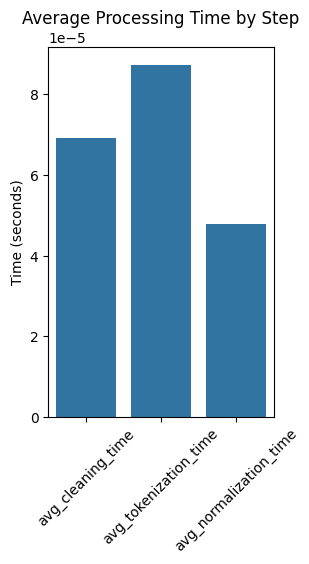

In [110]:
# Processing Time by Step
plt.subplot(1, 2, 1)
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.xticks(rotation=45)
plt.title('Average Processing Time by Step')
plt.ylabel('Time (seconds)')

Average Processing Time by Step:

- Tokenization Takes the Longest: The average tokenization time is the highest among the three steps, peaking at approximately 0.00011 seconds. This suggests that the tokenization process is the most computationally intensive or complex step in the overall processing.

- Normalization is the Quickest: The average normalization time is the lowest, at around 0.00006 seconds. This indicates that normalization is the most efficient step.

- Cleaning Time is in the Middle: The average cleaning time falls between tokenization and normalization, with a time of about 0.00008 seconds.

- Potential Bottleneck: Given that tokenization has the highest processing time, it could represent a bottleneck in the data processing pipeline. Optimizing the tokenization process could lead to significant improvements in overall processing time.

In [111]:
# Print Summary Statistics
print("\nProcessing Summary:")
print(f"Total tweets processed: {len(processed_results)}")
print(f"Average words per tweet: {np.mean(word_counts):.2f}")
print(f"Unique words found: {len(set(all_words))}")
print(f"Average processing time per tweet: {np.mean(list(metrics.values())):.4f} seconds")


Processing Summary:
Total tweets processed: 31962
Average words per tweet: 8.25
Unique words found: 38806
Average processing time per tweet: 0.0001 seconds


# **4. Conclusion** <a class="anchor" id="5"></a>

In this notebook, we explored fundamental text preprocessing techniques essential for NLP applications. By implementing tokenization, stopword removal, stemming, lemmatization, and vectorization, we transformed unstructured text into a structured format suitable for analysis. These methods are foundational for various machine learning tasks, including text classification, sentiment analysis, and topic modeling. Future improvements could involve advanced preprocessing techniques, such as Named Entity Recognition (NER) and word embeddings, to capture more semantic meaning from text data. This guide serves as a valuable reference for beginners looking to work with text data in their projects.

# **5. References** <a class="anchor" id="5"></a>

- [Ultimate Guide to deal with Text Data](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/)

- [Stop words](https://en.wikipedia.org/wiki/Stop_words)

- [NLTK Stopp words](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/)

- [Data pre-processing Evaluation](https://www.sciencedirect.com/science/article/pii/S1877050913004298)